In [44]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [45]:
import shutil
import os

# Source folder (where KaggleHub cached the dataset)
source_folder = r"C:\Users\Admin\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1"

# Target folder (where you want the dataset)
target_folder = r"D:\MLOPs\Dynamic_Price_Predication\Dynamic_Pricing_Model_(using_Mercari_Price_Suggestion_Dataset)\notebooks"

# Make sure the target folder exists
os.makedirs(target_folder, exist_ok=True)

# Copy all files from source to target
shutil.copytree(source_folder, target_folder, dirs_exist_ok=True)

print(f"Dataset copied to: {target_folder}")


Dataset copied to: D:\MLOPs\Dynamic_Price_Predication\Dynamic_Pricing_Model_(using_Mercari_Price_Suggestion_Dataset)\notebooks


In [46]:
import numpy as np
import pandas as pd

data=pd.read_csv("D:/MLOPs/Dynamic_Price_Predication/Dynamic_Pricing_Model_(using_Mercari_Price_Suggestion_Dataset)/notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [47]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [48]:
data.shape

(7043, 21)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

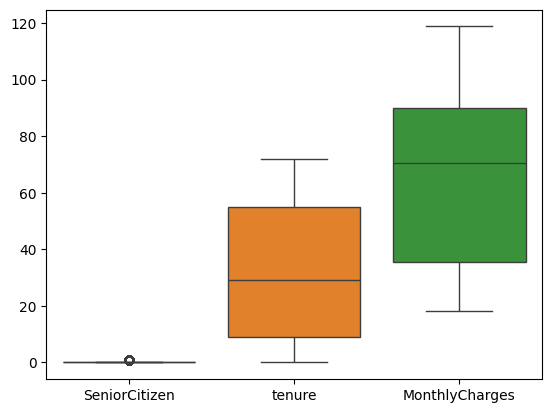

In [50]:
import seaborn as sns
sns.boxplot(data=data)

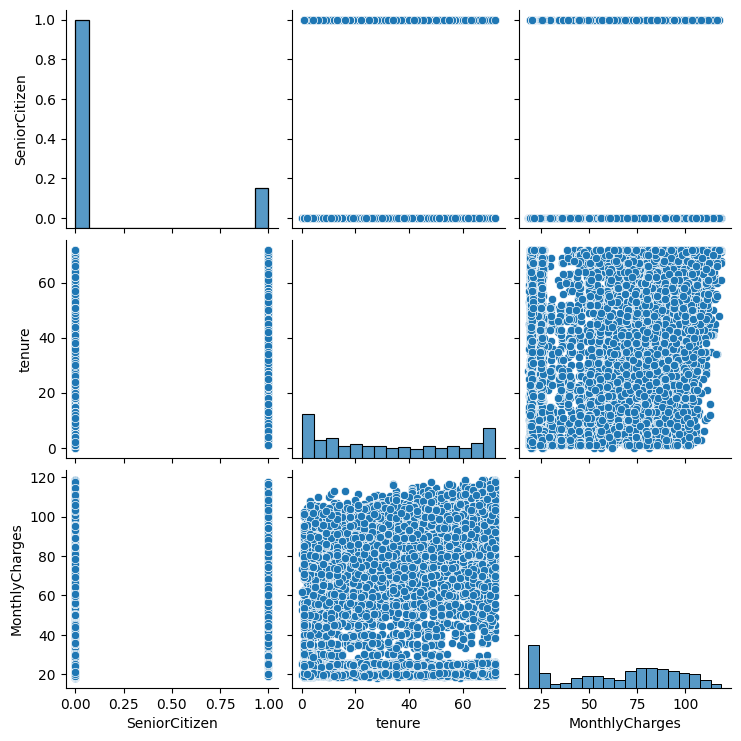

In [51]:
sns.pairplot(data=data)

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'data'
data = data.copy()  # just to be safe

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
data_encoded = data.copy()
for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data[col])

# Compute correlation matrix
corr_matrix = data_encoded.corr()

# Set a threshold for "strong correlation" (e.g., absolute correlation > 0.5)
threshold = 0.5

# Find pairs of correlated variables
correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
correlated_df = pd.DataFrame(correlated_pairs, columns=['Variable1', 'Variable2', 'Correlation'])

print("Highly correlated variable pairs:")
print(correlated_df)


Highly correlated variable pairs:
  Variable1 Variable2  Correlation
0    tenure  Contract     0.671607


In [53]:
data['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [54]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
data=data.drop('customerID',axis=1)

In [56]:
for i in data.columns:
    print(f"Column: {i}")
    print(data[i].unique())
    print("-"*50)

Column: gender
['Female' 'Male']
--------------------------------------------------
Column: SeniorCitizen
[0 1]
--------------------------------------------------
Column: Partner
['Yes' 'No']
--------------------------------------------------
Column: Dependents
['No' 'Yes']
--------------------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Column: PhoneService
['No' 'Yes']
--------------------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------

In [57]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding in-place on the existing DataFrame
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Check first few rows to confirm
print(data.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[944  92]
 [192 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



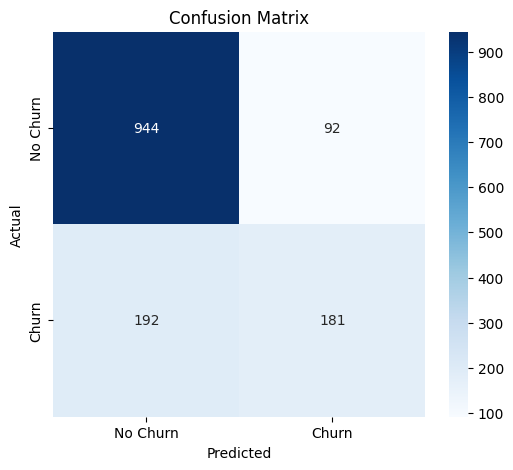

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


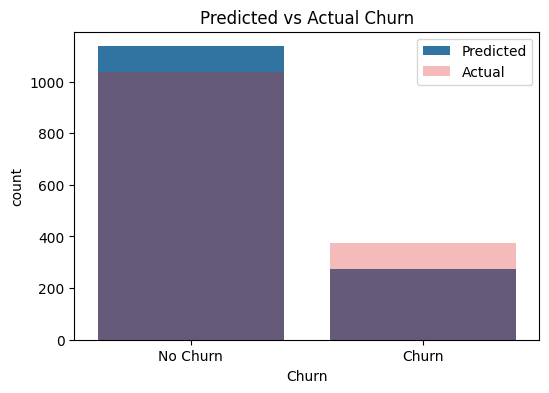

In [60]:
# Compare predicted vs actual churn
plt.figure(figsize=(6,4))
sns.countplot(x=y_pred, label='Predicted')
sns.countplot(x=y_test, color='red', alpha=0.3, label='Actual')
plt.xticks([0,1], ['No Churn','Churn'])
plt.legend()
plt.title('Predicted vs Actual Churn')
plt.show()


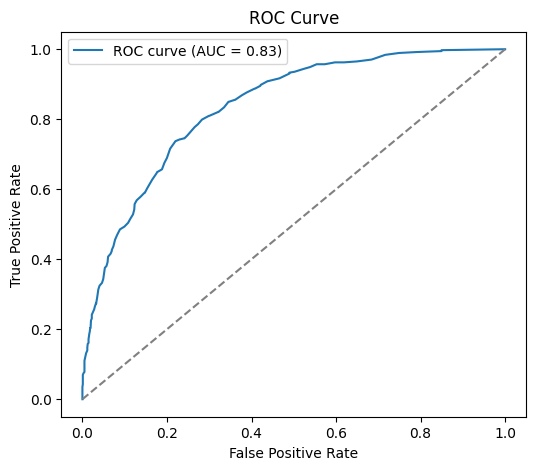

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for positive class
y_prob = rf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


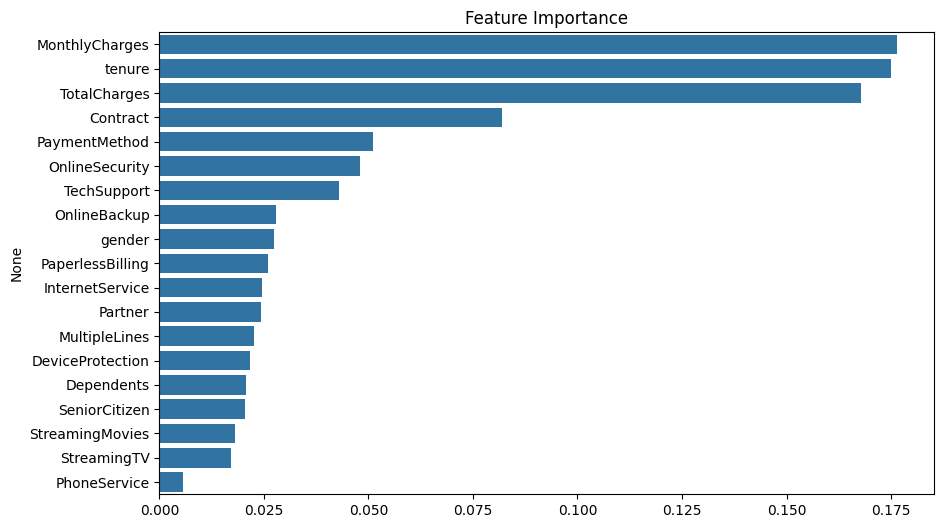

In [62]:
import pandas as pd

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance')
plt.show()
